<a href="https://colab.research.google.com/github/Mahnoor-Shoukat-Ali/PGD__DeepLearning/blob/main/Image_Classification_using_Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import os
import zipfile
from google.colab import files
import matplotlib.pyplot as plt


In [ ]:
# Define paths
zip_file_path = '/content/Image-Classification-Transfer-Learning-master.zip'
extract_dir = '/content/Image-Classification-Transfer-Learning-master'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [ ]:
dataset_dir = os.path.join(extract_dir, 'Image-Classification-Transfer-Learning-master', 'Dataset')
train_dir = os.path.join(dataset_dir, 'training')
test_dir = os.path.join(dataset_dir, 'test')

In [ ]:
# ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1554 images belonging to 20 classes.


In [ ]:
# ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_image_paths = [os.path.join(test_dir, fname) for fname in os.listdir(test_dir) if fname.endswith(('.jpg', '.png'))]


In [ ]:
def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    return img_array

In [ ]:
test_images = [preprocess_image(path) for path in test_image_paths]
test_images = tf.concat(test_images, axis=0)


In [ ]:
# Build the model
base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(20, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


In [ ]:
# Print model summary
model.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 56, 56, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 56, 56, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 58, 58, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_preact_r… │
│ (Conv2D)             

 Total params: 60,450,324 (230.60 MB)

 Trainable params: 60,306,580 (230.05 MB)

 Non-trainable params: 143,744 (561.50 KB)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=train_generator  # Use a portion of training data as validation data
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 287s 3s/step - accuracy: 0.5525 - loss: 1.7580 - val_accuracy: 0.9247 - val_loss: 0.2933
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9281 - loss: 0.2478 - val_accuracy: 0.9562 - val_loss: 0.1681
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9496 - loss: 0.1751 - val_accuracy: 0.9723 - val_loss: 0.1012
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9628 - loss: 0.1471 - val_accuracy: 0.9595 - val_loss: 0.1460
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9558 - loss: 0.1245 - val_accuracy: 0.9575 - val_loss: 0.1446
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9689 - loss: 0.1043 - val_accuracy: 0.9691 - val_loss: 0.1166
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9609 - loss: 0.1312 - val_accuracy: 0.9620 - val_loss: 0.1755
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9589 - loss: 0.1234 - val_accuracy: 0.9614 - val_loss: 0.1433
Ep

In [ ]:
# Evaluate the model on training data (as test data isn't labeled)
loss, accuracy = model.evaluate(train_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 476ms/step - accuracy: 0.9774 - loss: 0.0616
Test Loss: 0.06831520050764084
Test Accuracy: 0.9768339991569519


In [ ]:
# Predict on test images
predictions = model.predict(test_images)

16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 937ms/step


In [ ]:
# Decode predictions
class_indices = train_generator.class_indices
class_labels = list(class_indices.keys())
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = [class_labels[i] for i in predicted_classes]


In [ ]:
# Print predictions
for image_path, label in zip(test_image_paths, predicted_labels):
    print(f"Image: {image_path}, Predicted label: {label}")

Image: /content/Image-Classification-Transfer-Learning-master/Image-Classification-Transfer-Learning-master/Dataset/test/IMG_2007.jpg, Predicted label: laptop
Image: /content/Image-Classification-Transfer-Learning-master/Image-Classification-Transfer-Learning-master/Dataset/test/IMG_1661.jpg, Predicted label: calculator
Image: /content/Image-Classification-Transfer-Learning-master/Image-Classification-Transfer-Learning-master/Dataset/test/IMG_151.jpg, Predicted label: laptop
Image: /content/Image-Classification-Transfer-Learning-master/Image-Classification-Transfer-Learning-master/Dataset/test/IMG_455.jpg, Predicted label: laptop
Image: /content/Image-Classification-Transfer-Learning-master/Image-Classification-Transfer-Learning-master/Dataset/test/IMG_117.jpg, Predicted label: calculator
Image: /content/Image-Classification-Transfer-Learning-master/Image-Classification-Transfer-Learning-master/Dataset/test/IMG_53.jpg, Predicted label: calculator
Image: /content/Image-Classification-Tr

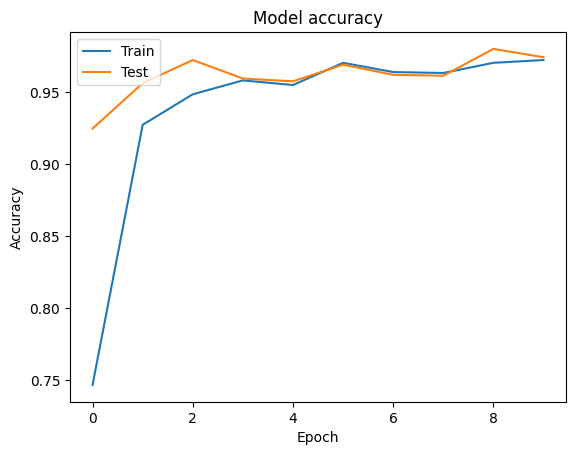

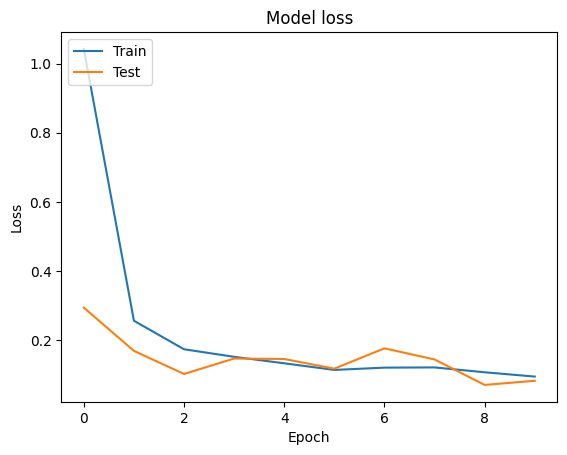

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()